Import Data and print Data Frame

In [4]:
import numpy as np
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv")
print(f"df:\n{df}")

y = df["logS"]
print(f"y:\n{y}")
X = df.drop("logS", axis = 1)
print(f"Χ:\n{X}")

df:
      MolLogP    MolWt  NumRotatableBonds  AromaticProportion   logS
0     2.59540  167.850                0.0            0.000000 -2.180
1     2.37650  133.405                0.0            0.000000 -2.000
2     2.59380  167.850                1.0            0.000000 -1.740
3     2.02890  133.405                1.0            0.000000 -1.480
4     2.91890  187.375                1.0            0.000000 -3.040
...       ...      ...                ...                 ...    ...
1139  1.98820  287.343                8.0            0.000000  1.144
1140  3.42130  286.114                2.0            0.333333 -4.925
1141  3.60960  308.333                4.0            0.695652 -3.893
1142  2.56214  354.815                3.0            0.521739 -3.790
1143  2.02164  179.219                1.0            0.461538 -2.581

[1144 rows x 5 columns]
y:
0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790


Split the Data set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
print(f"X_train:\n{X_train}")
print(f"X_test:\n{X_test}")

X_train:
     MolLogP    MolWt  NumRotatableBonds  AromaticProportion
107  3.14280  112.216                5.0            0.000000
378 -2.07850  142.070                0.0            0.000000
529 -0.47730  168.152                0.0            0.000000
546 -0.86740  154.125                0.0            0.000000
320  1.62150  100.161                2.0            0.000000
..       ...      ...                ...                 ...
802  3.00254  250.301                1.0            0.842105
53   2.13860   82.146                3.0            0.000000
350  5.76304  256.348                0.0            0.900000
79   3.89960  186.339               10.0            0.000000
792  2.52334  310.297                3.0            0.300000

[915 rows x 4 columns]
X_test:
      MolLogP    MolWt  NumRotatableBonds  AromaticProportion
822   2.91000  172.268                7.0            0.000000
118   7.27400  360.882                1.0            0.666667
347   1.94040  145.161                0.0

Build and train the model

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
LinearRegression()
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)
print(y_lr_train_pred, y_lr_test_pred)
print(f"y_lr_train_pred:\n{y_lr_train_pred}")

print(f"y_lr_test_pred:\n{y_lr_test_pred}")

print(f"y_train:\n{y_train}")


print(f"y_lr_train_pred:\n{y_lr_train_pred}")

[-2.83668969  0.84208401 -0.50930302 -0.13058053 -1.6269208  -2.86103037
 -2.32208333 -4.16684323 -5.04235077 -2.29737009 -3.15082845 -4.33037208
 -1.43700682 -2.59060064 -7.09025955 -2.32734557 -4.19073421 -2.63904005
 -3.58104074 -3.75929058 -2.5501665  -3.26968347 -2.78911367 -2.69251051
 -0.77437547 -6.61955792 -2.99084623 -2.36975061 -7.18167736 -1.52816491
 -4.81736265 -0.86996608 -7.09025955 -1.87404275 -2.58013247 -4.80953284
 -4.17454084 -1.95444152 -3.50503339 -2.7411418  -1.87131835 -2.45270806
 -3.07252433 -1.48988982 -3.98778754 -1.35216679 -0.16932277 -6.05237002
 -3.29550658  0.30513174 -3.25501463 -5.31993586 -0.4733928  -4.79180882
 -5.82486323 -2.70343539 -3.70838271 -2.4987341  -2.12301018 -3.11393974
 -2.79842053 -1.38274662 -4.3267103  -3.57778946 -3.42356884 -9.15826626
 -6.52588866 -1.75832085 -4.97842312 -1.59255758 -1.91317252 -2.81075595
 -1.14056747 -1.6326702  -1.6269208  -5.33227425 -3.88805074  0.70432882
 -3.99288096 -2.22595859 -2.63405871 -1.80643013 -4

Calculate MSE and R2 for both training and test sets

In [7]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

print('LR MSE (Train): ', lr_train_mse)

print('LR R2 (Train): ', lr_train_r2)

print('LR MSE (Test): ', lr_test_mse)

print('LR R2 (Test): ', lr_test_r2)


LR MSE (Train):  1.0075362951093687
LR R2 (Train):  0.7645051774663391
LR MSE (Test):  1.0206953660861033
LR R2 (Test):  0.7891616188563282


Print the results as a matrix-like DataFrame

In [8]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = [ 'Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2' ]
print(lr_results)


              Method Training MSE Training R2  Test MSE   Test R2
0  Linear Regression     1.007536    0.764505  1.020695  0.789162


Build and train a new ML Model (Random Forest)

In [9]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth = 2, random_state = 100)
rf.fit(X_train, y_train)
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

Calculate the new values for MSE and R2

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)


Print the results as a matrix-like DataFrame

In [11]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = [ 'Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2' ]
print(rf_results)


          Method Training MSE Training R2  Test MSE   Test R2
0  Random Forest     1.028228    0.759669  1.407688  0.709223


Comparison of the 2 models

In [12]:
df_models = pd.concat([rf_results, lr_results], axis=0)
print(df_models)


              Method Training MSE Training R2  Test MSE   Test R2
0      Random Forest     1.028228    0.759669  1.407688  0.709223
0  Linear Regression     1.007536    0.764505  1.020695  0.789162


Linear Regression has the smallest MSE value and the largest R2 score so it performs better than RandomForest Model.

Then, we will visualize the relationship between the actual and predicted values for the training set of the Linear Regression model.

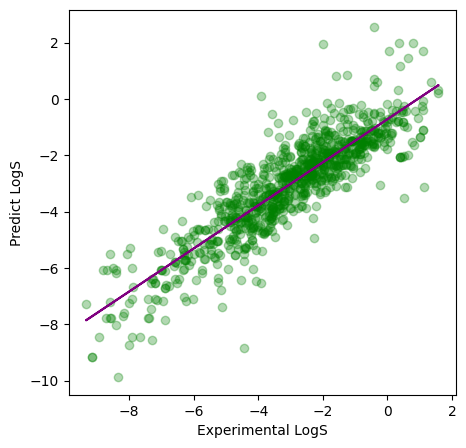

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, color= 'green', alpha=0.3)

z= np.poly1d(np.polyfit(y_train, y_lr_train_pred, 1))

plt.plot(y_train, z(y_train), color='purple')
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')

plt.show()
